# STOCK MARKET ANALYSIS AND PREDICTION

In [ ]:

#Description : This project is about predecting the closing stock price of Amazon using an artificial recuurent neural network model called
               #Long Short Term Memory(LSTM) OR ARIMA (Auto regressive integrated moving average) using past data.

In [1]:
# Importing the useful libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [8]:
#df=pd.get_csv("AMZN.csv")
#Load the dataset
#retail_df=pd.read_csv("retail_sales_dataset.csv")
df=pd.read_csv("AMZN.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600


In [9]:
df.shape

(6257, 7)

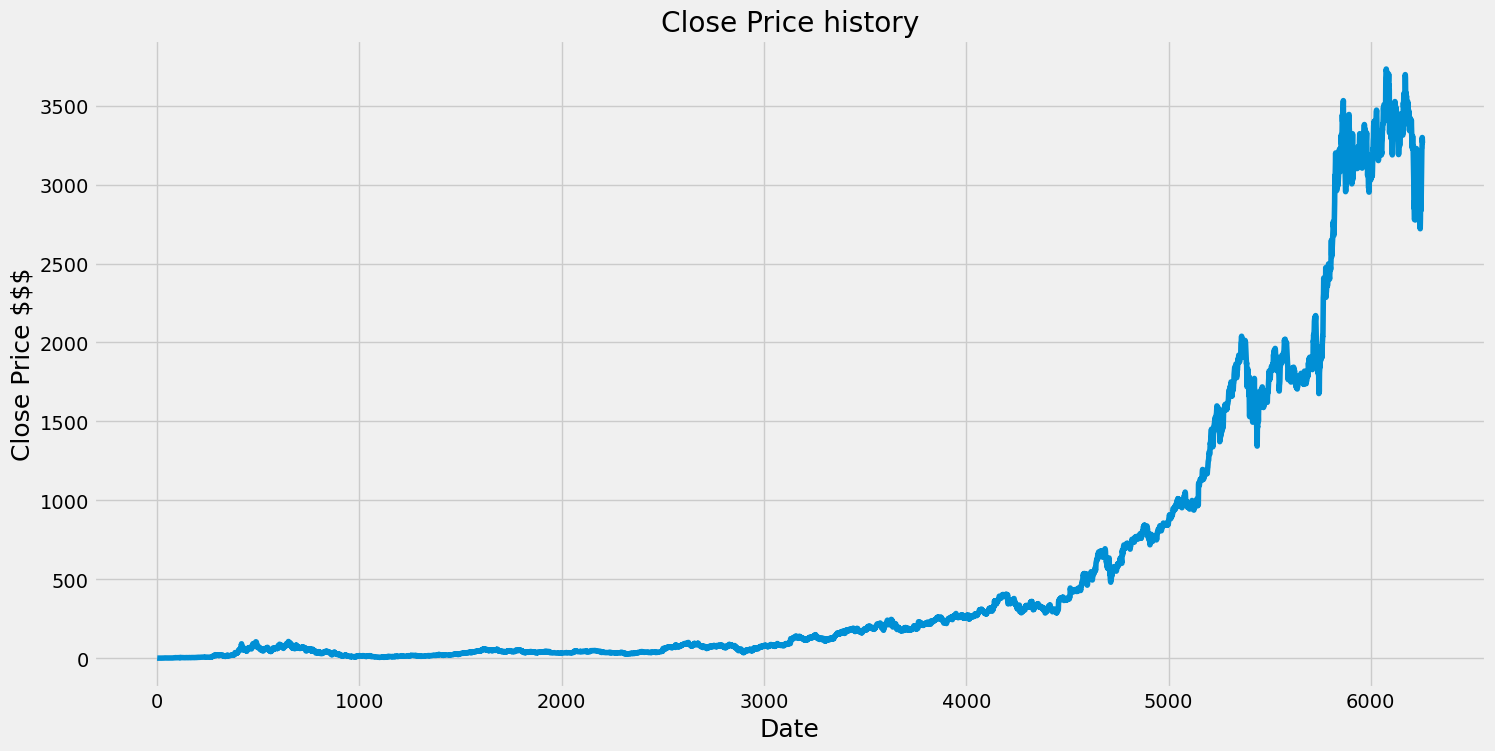

In [10]:
#visulaize the closing data
plt.figure(figsize = (16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $$$', fontsize=18)
plt.show()

In [11]:
#create New dataframe which contains only close variable
data = df.filter(['Close'])
#Data frame to numpy array
dataset = data.values
#Train data set rows
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

5006

In [12]:
#scaling the data

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.50803720e-04],
       [8.93653463e-05],
       [8.37798446e-05],
       ...,
       [8.83745778e-01],
       [8.75804758e-01],
       [8.77099681e-01]])

In [13]:
#creating a Training DataSet and scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([1.50803720e-04, 8.93653463e-05, 8.37798446e-05, 6.42313929e-05,
       8.37798446e-06, 0.00000000e+00, 2.79267042e-05, 5.02679068e-05,
       3.63046887e-05, 2.93229456e-05, 2.79267042e-05, 3.07194551e-05,
       2.23414706e-05, 5.58550171e-06, 3.90974396e-05, 6.98166266e-05,
       7.81946110e-05, 5.02679068e-05, 3.90974396e-05, 5.58534085e-05,
       5.02679068e-05, 4.74754240e-05, 2.93229456e-05, 3.07194551e-05,
       3.07194551e-05, 3.49084473e-05, 2.79267042e-05, 3.07194551e-05,
       3.07194551e-05, 3.07194551e-05, 2.51339534e-05, 3.90974396e-05,
       3.21156965e-05, 5.16644163e-05, 1.38236744e-04, 1.61974456e-04,
       2.42961549e-04, 2.48547051e-04, 3.12778176e-04, 2.40169067e-04,
       1.98279144e-04, 2.79266238e-04, 2.51339534e-04, 2.20620347e-04,
       2.03864378e-04, 2.10846121e-04, 1.98279144e-04, 2.40169067e-04,
       2.31791082e-04, 2.23413098e-04, 2.48547051e-04, 2.90436973e-04,
       2.82058989e-04, 2.68095503e-04, 2.73681005e-04, 2.45754300e-04,
     

In [14]:
#converting X_train, y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data
x_train = np.reshape(x_train , (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(4946, 60, 1)

In [16]:
# Define the model as a sequential model
from keras.layers import Input, LSTM, Dense
from keras.models import Model
model = Sequential()

# Add the first LSTM layer with 50 units, returning sequences, and input shape (number of time steps, number of features)
# Set return_state=True to return the final hidden state and cell state
lstm1 = LSTM(50, return_sequences=True, return_state=True, input_shape=(x_train.shape[1], 1))

# Add the second LSTM layer with 50 units, not returning sequences
# Set return_state=True to return the final hidden state and cell state
lstm2 = LSTM(50, return_sequences=False, return_state=True)

# Connect the input to the first LSTM layer
inputs = Input(shape=(x_train.shape[1], 1))
x = lstm1(inputs)

# Connect the output of the first LSTM layer to the second LSTM layer
x, state_h, state_c = lstm2(x)

# Add a dense layer with 25 units
x = Dense(25)(x)

# Add the output layer with 1 unit
outputs = Dense(1)(x)

# Define the model with the input and output layers
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()


C:\Users\rgukt\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Layer 'lstm_1' expected 1 input(s). Received 3 instead.

In [17]:
from keras.layers import Input, LSTM, Dense
from keras.models import Model

# Define the input shape based on your training data
inputs = Input(shape=(x_train.shape[1], 1))

# Add the first LSTM layer with 50 units, returning sequences
lstm1_output, lstm1_state_h, lstm1_state_c = LSTM(50, return_sequences=True, return_state=True)(inputs)

# Add the second LSTM layer with 50 units, not returning sequences
lstm2_output, lstm2_state_h, lstm2_state_c = LSTM(50, return_sequences=False, return_state=True)(lstm1_output)

# Add a dense layer with 25 units
dense_output = Dense(25)(lstm2_output)

# Add the output layer with 1 unit
outputs = Dense(1)(dense_output)

# Define the model with the input and output layers
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ [(None, 60, 50), (None,     │          10,400 │
│                                      │ 50), (None, 50)]            │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ [(None, 50), (None, 50),    │          20,200 │
│                                      │ (None, 50)]                 │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#compling the model

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

In [20]:
#training the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 126s 23ms/step - loss: 1.6381e-04


In [21]:
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

In [22]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 119s 23ms/step - loss: 171.1829


In [23]:
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

4946/4946 ━━━━━━━━━━━━━━━━━━━━ 116s 22ms/step - loss: 3.1631e-05


In [26]:
#creating the test data
test_data = scaled_data[training_data_len-60:, :]
#creating datasets x_test, y_test
x_test=[]
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [27]:
#convert the data into numpy array
x_test = np.array(x_test)
x_test

array([[0.213003  , 0.21383946, 0.21775901, ..., 0.23863561, 0.24274283,
        0.24339967],
       [0.21383946, 0.21775901, 0.21869735, ..., 0.24274283, 0.24339967,
        0.24045062],
       [0.21775901, 0.21869735, 0.21670807, ..., 0.24339967, 0.24045062,
        0.23953909],
       ...,
       [0.91687973, 0.90937835, 0.91469471, ..., 0.84272717, 0.86423646,
        0.8655287 ],
       [0.90937835, 0.91469471, 0.90686633, ..., 0.86423646, 0.8655287 ,
        0.88374578],
       [0.91469471, 0.90686633, 0.9038824 , ..., 0.8655287 , 0.88374578,
        0.87580476]])

In [28]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [29]:
#Predicting the price by models
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


In [30]:
from sklearn.metrics import mean_squared_error
import math

# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


Mean Squared Error: 711755.2181208777
Root Mean Squared Error: 843.6558647463299


In [31]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions)
print("MAPE: {:.2f}%".format(mape))

MAPE: 22.65%


In [32]:
# Get Root Mean Square Error
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

843.6558647463299

C:\Users\rgukt\AppData\Local\Temp\ipykernel_5844\3621154077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


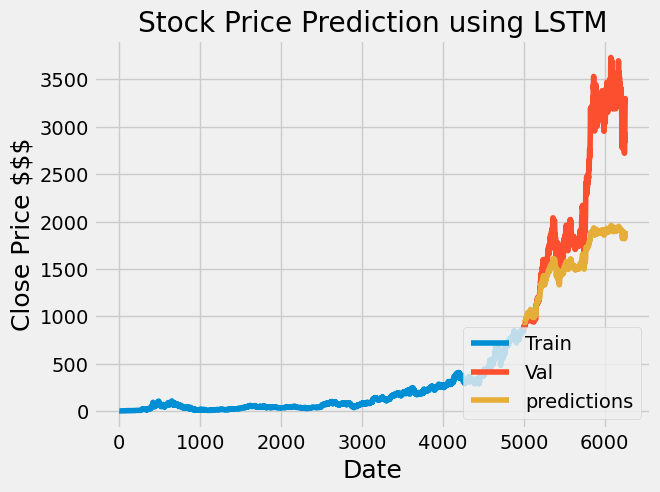

In [33]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visulizing the data
plt.figure()
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $$$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc = 'lower right')
plt.show()


In [34]:
#show valid and predicted prices
valid

,Close,predictions
5006,898.280029,937.097107
5007,894.880005,938.775696
5008,907.039978,937.122253
5009,902.359985,938.400635
5010,896.229980,939.141418
...,...,...
6252,3225.010010,1868.571167
6253,3229.830078,1882.632812
6254,3297.780029,1891.845093
6255,3268.159912,1900.493896
